# ERA V2 S5

### Abstract:
Train a model to classify handwritten digits.

Training is done on MNIST dataset using PyTorch.
The MNIST dataset consists of grayscale images of handwritten digits (0 to 9) with a size of 28x28 pixels.

### Files:
**model.py**: Contains the definition of the neural network architecture used for training.

**utils.py**: Contains utility functions for data preprocessing, evaluation, plotting etc.

**S5.ipynb**: Notebook for training the model on the MNIST dataset.



#### Step 1 : Importing the required libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# from utils import download_MNIST, view_dataset, selectDevice, GetCorrectPredCount, GetCorrectPredCount, viewAnalysis
# from utils import *               # Non recommended version.
%run utils.py                       # Untill the utils.py is finalised
from model import Network
from torchvision import transforms
from torchsummary import summary

#### Step 2 : Preparing the Training and Testing Data

In [2]:
batch_size = 512
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])


In [3]:
train_data = download_MNIST(True, train_transforms)
test_data  = download_MNIST(False, test_transforms)

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

#### Step 3 : Viewing the Data

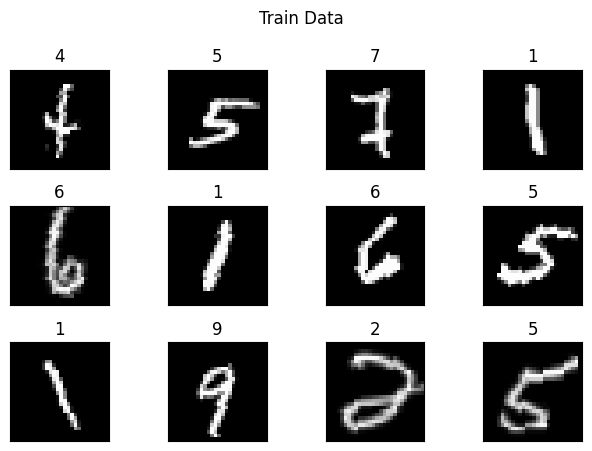

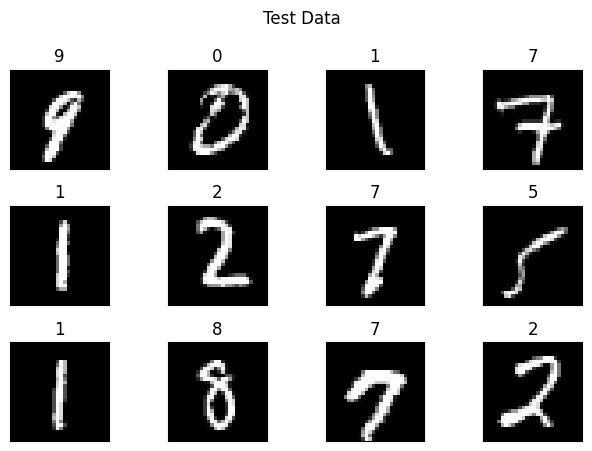

In [4]:
view_dataset(train_loader, "Train Data")
view_dataset(test_loader, "Test Data")

#### Step 6 : Analyze Training, Testing Loss and Accuracyting Loss and Accuracyl

In [5]:
device = selectDevice()
model = Network().to(device)
summary(model, input_size=(1, 28, 28))

Using CUDA!
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


#### Step 5 : Training the Testing the model

In [6]:
from tqdm import tqdm

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

def train(model, device, train_loader, optimizer, criterion):
    model.train()
    pbar = tqdm(train_loader)

    train_loss = 0
    correct = 0
    processed = 0

    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device) # Get Batch
        optimizer.zero_grad()

        # Predict
        pred = model(data)  # Pass Batch

        # Calculate loss
        loss = criterion(pred, target)  # Calculate Loss
        train_loss+=loss.item()

        # Backpropagation
        loss.backward()     # Calculate Gradients
        optimizer.step()    # Update Weights

        correct += GetCorrectPredCount(pred, target)
        processed += len(data)

        pbar.set_description(desc= f'Train: Loss={loss.item():0.4f} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')

    train_acc.append(100*correct/processed)
    train_losses.append(train_loss/len(train_loader))

def test(model, device, test_loader, criterion):
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)

            output = model(data)
            test_loss += criterion(output, target, reduction='sum').item()  # sum up batch loss

            correct += GetCorrectPredCount(output, target)


    test_loss /= len(test_loader.dataset)
    test_acc.append(100. * correct / len(test_loader.dataset))
    test_losses.append(test_loss)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [7]:
train_test_model(Network, device, train, train_loader, test, test_loader)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.4962 Batch_id=117 Accuracy=35.41: 100%|██████████| 118/118 [00:28<00:00,  4.17it/s]


Test set: Average loss: 0.4381, Accuracy: 8722/10000 (87.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0962 Batch_id=117 Accuracy=91.67: 100%|██████████| 118/118 [00:19<00:00,  5.97it/s]


Test set: Average loss: 0.1250, Accuracy: 9609/10000 (96.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.4402 Batch_id=117 Accuracy=95.81: 100%|██████████| 118/118 [00:20<00:00,  5.81it/s]


Test set: Average loss: 0.0632, Accuracy: 9798/10000 (97.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0721 Batch_id=117 Accuracy=96.78: 100%|██████████| 118/118 [00:21<00:00,  5.45it/s]


Test set: Average loss: 0.0550, Accuracy: 9837/10000 (98.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0455 Batch_id=117 Accuracy=97.39: 100%|██████████| 118/118 [00:20<00:00,  5.84it/s]


Test set: Average loss: 0.0495, Accuracy: 9843/10000 (98.43%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0277 Batch_id=117 Accuracy=97.58: 100%|██████████| 118/118 [00:19<00:00,  6.01it/s]


Test set: Average loss: 0.0435, Accuracy: 9866/10000 (98.66%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0688 Batch_id=117 Accuracy=98.03: 100%|██████████| 118/118 [00:20<00:00,  5.76it/s]


Test set: Average loss: 0.0349, Accuracy: 9890/10000 (98.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0529 Batch_id=117 Accuracy=98.08: 100%|██████████| 118/118 [00:20<00:00,  5.72it/s]


Test set: Average loss: 0.0340, Accuracy: 9888/10000 (98.88%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0164 Batch_id=117 Accuracy=98.38: 100%|██████████| 118/118 [00:19<00:00,  5.98it/s]


Test set: Average loss: 0.0282, Accuracy: 9907/10000 (99.07%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0211 Batch_id=117 Accuracy=98.41: 100%|██████████| 118/118 [00:19<00:00,  5.99it/s]


Test set: Average loss: 0.0289, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0114 Batch_id=117 Accuracy=98.53: 100%|██████████| 118/118 [00:21<00:00,  5.43it/s]


Test set: Average loss: 0.0289, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0117 Batch_id=117 Accuracy=98.63: 100%|██████████| 118/118 [00:20<00:00,  5.72it/s]


Test set: Average loss: 0.0290, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0305 Batch_id=117 Accuracy=98.73: 100%|██████████| 118/118 [00:21<00:00,  5.43it/s]


Test set: Average loss: 0.0265, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0227 Batch_id=117 Accuracy=98.70: 100%|██████████| 118/118 [00:19<00:00,  5.99it/s]


Test set: Average loss: 0.0264, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0277 Batch_id=117 Accuracy=98.87: 100%|██████████| 118/118 [00:19<00:00,  5.90it/s]


Test set: Average loss: 0.0267, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.1051 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:20<00:00,  5.63it/s]


Test set: Average loss: 0.0220, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0426 Batch_id=117 Accuracy=99.12: 100%|██████████| 118/118 [00:20<00:00,  5.72it/s]


Test set: Average loss: 0.0213, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0183 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:19<00:00,  5.97it/s]


Test set: Average loss: 0.0211, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0172 Batch_id=117 Accuracy=99.12: 100%|██████████| 118/118 [00:20<00:00,  5.77it/s]


Test set: Average loss: 0.0211, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0347 Batch_id=117 Accuracy=99.12: 100%|██████████| 118/118 [00:20<00:00,  5.73it/s]


Test set: Average loss: 0.0209, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-03.


#### Step 6 : Analyze Training, Testing Loss and Accuracy

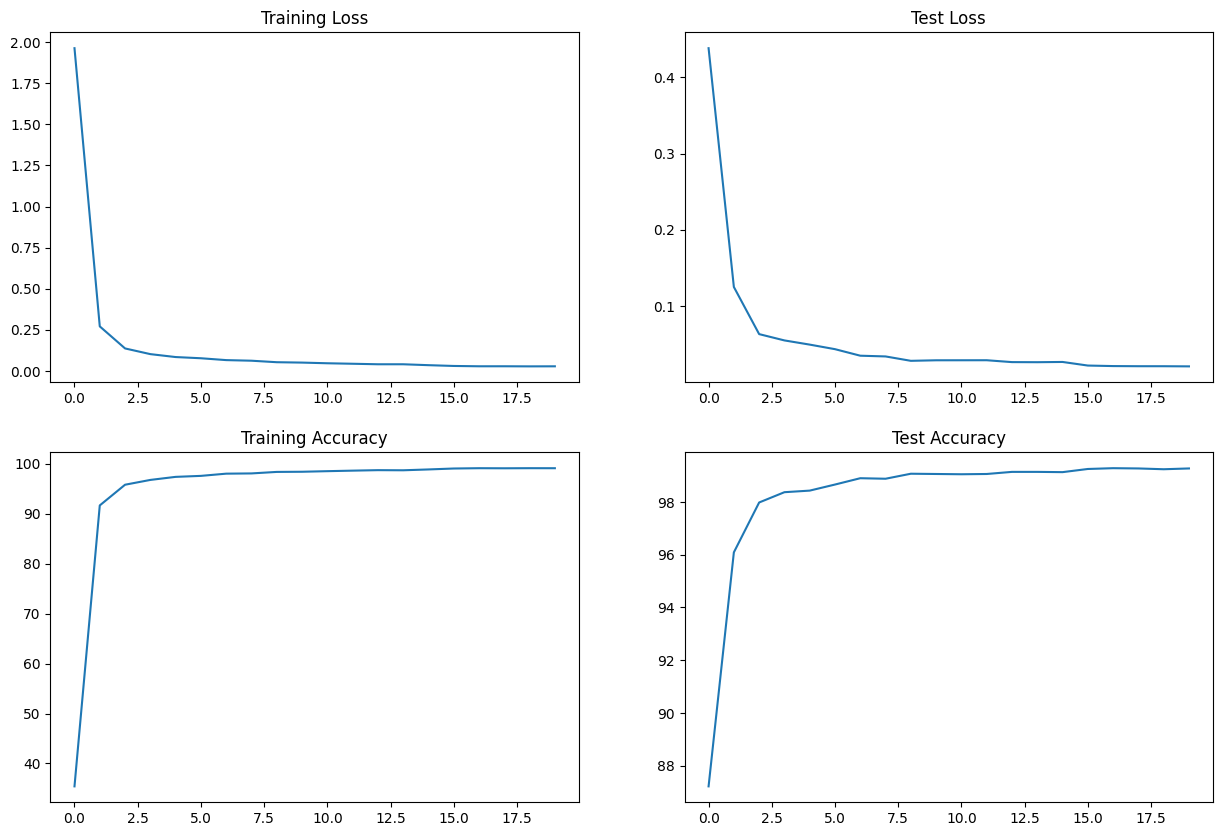

In [8]:
viewAnalysis(train_losses, train_acc, test_losses, test_acc)